In [14]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Read in cleaned data
from google.colab import files
csv_file = files.upload()
df = pd.read_csv('clean_flight_data.csv')

# Take out y, take log price
y = np.log(df['Price'])

# Remove superfluous information
X = df.drop(columns=['Price', 'Source', 'Destination', 'Additional_Info'])

# One hot encoding of categorical variables
enc = OneHotEncoder(sparse=False)
categorical_variables = ['Airline', 'Total_Stops', 'stop1', 'stop2', 'stop3', 'stop4', 'stop5']
numeric_variables = ['day', 'month', 'dep_hr', 'dep_min', 'arr_hr', 'arr_min', 'duration']
encoded_data = enc.fit_transform(df[categorical_variables])
encoded_df = pd.DataFrame(
    encoded_data,
    columns= enc.get_feature_names_out(categorical_variables)
)

# Put it all together
X = pd.concat([X[numeric_variables], encoded_df], axis=1)



Saving clean_flight_data.csv to clean_flight_data.csv


In [15]:
X.head()

,day,month,dep_hr,dep_min,arr_hr,arr_min,duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,stop4_ HYD,stop4_ NAG,stop4_ TRV,stop4_None,stop5_ BLR,stop5_ COK,stop5_ DEL,stop5_ HYD,stop5_ VGA,stop5_None
0,24,3,22,20,1,10,10200.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,1,5,50,13,15,26700.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6,9,9,25,4,25,68400.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,12,18,5,23,30,19500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,1,16,50,21,35,17100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

In [17]:
# Split test/train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Scaling predictors
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
X

,day,month,dep_hr,dep_min,arr_hr,arr_min,duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,stop4_ HYD,stop4_ NAG,stop4_ TRV,stop4_None,stop5_ BLR,stop5_ COK,stop5_ DEL,stop5_ HYD,stop5_ VGA,stop5_None
0,24,3,22,20,1,10,10200.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,1,5,50,13,15,26700.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6,9,9,25,4,25,68400.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,12,18,5,23,30,19500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,1,16,50,21,35,17100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,9,19,55,22,25,9000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10679,27,4,20,45,23,20,9300.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10680,27,4,8,20,11,20,10800.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10681,3,1,11,30,14,10,9600.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
## -- Neural Network 1 -- ##
# 1 Hidden Layer with 50 hidden nodes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
n_inputs = X_train.shape[1]

hidden_nodes_layer1 = 50

model1 = Sequential()
model1.add(Dense(hidden_nodes_layer1, input_dim=n_inputs, activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                6400      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,451
Trainable params: 6,451
Non-trainable params: 0
_________________________________________________________________


In [29]:
model1.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [38]:
history = model1.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
251/251 [==============================] - 1s 5ms/step - loss: 0.0419 - mse: 0.0419
Epoch 2/200
251/251 [==============================] - 1s 5ms/step - loss: 0.0411 - mse: 0.0411
Epoch 3/200
251/251 [==============================] - 1s 3ms/step - loss: 0.0405 - mse: 0.0405
Epoch 4/200
251/251 [==============================] - 1s 3ms/step - loss: 0.0405 - mse: 0.0405
Epoch 5/200
251/251 [==============================] - 0s 2ms/step - loss: 0.0402 - mse: 0.0402
Epoch 6/200
251/251 [==============================] - 0s 2ms/step - loss: 0.0410 - mse: 0.0410
Epoch 7/200
251/251 [==============================] - 0s 2ms/step - loss: 0.0398 - mse: 0.0398
Epoch 8/200
251/251 [==============================] - 1s 2ms/step - loss: 0.0406 - mse: 0.0406
Epoch 9/200
251/251 [==============================] - 0s 2ms/step - loss: 0.0425 - mse: 0.0425
Epoch 10/200
251/251 [==============================] - 0s 2ms/step - loss: 0.0412 - mse: 0.0412
Epoch 11/200
251/251 [=================

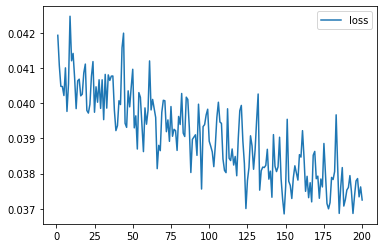

In [39]:
# Plot loss over epochs
df1 = pd.DataFrame(history.history, index=range(1, len(history.history['loss']) + 1))
df1.plot(y='loss')

In [40]:
# Calculate model results on the test set
model1_loss, model1_accuracy = model1.evaluate(X_test_scaled, y_test, verbose=2)

84/84 - 0s - loss: 0.1380 - mse: 0.1380 - 225ms/epoch - 3ms/step


In [44]:
# Results suggest our model is overfitting. Let's try adding a Dropout layer
from keras.layers import Dropout 
model2 = Sequential()
model2.add(Dense(hidden_nodes_layer1, input_dim=n_inputs, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='linear'))

model2.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                6400      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,451
Trainable params: 6,451
Non-trainable params: 0
_________________________________________________________________


In [45]:
model2.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [48]:
history2 = model2.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
251/251 [==============================] - 1s 2ms/step - loss: 24.3292 - mse: 24.3292
Epoch 2/200
251/251 [==============================] - 1s 2ms/step - loss: 3.2188 - mse: 3.2188
Epoch 3/200
251/251 [==============================] - 1s 4ms/step - loss: 2.3108 - mse: 2.3108
Epoch 4/200
251/251 [==============================] - 1s 4ms/step - loss: 1.9976 - mse: 1.9976
Epoch 5/200
251/251 [==============================] - 1s 3ms/step - loss: 1.7573 - mse: 1.7573
Epoch 6/200
251/251 [==============================] - 1s 4ms/step - loss: 1.7461 - mse: 1.7461
Epoch 7/200
251/251 [==============================] - 1s 4ms/step - loss: 1.6725 - mse: 1.6725
Epoch 8/200
251/251 [==============================] - 1s 4ms/step - loss: 1.5426 - mse: 1.5426
Epoch 9/200
251/251 [==============================] - 1s 5ms/step - loss: 1.5815 - mse: 1.5815
Epoch 10/200
251/251 [==============================] - 1s 4ms/step - loss: 1.4654 - mse: 1.4654
Epoch 11/200
251/251 [===============

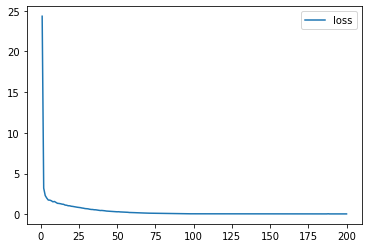

In [49]:
df2 = pd.DataFrame(history2.history, index=range(1, len(history2.history['loss']) + 1))
df2.plot(y='loss')

In [50]:
model2_loss, model2_accuracy = model2.evaluate(X_test_scaled, y_test, verbose=2)

84/84 - 0s - loss: 0.0704 - mse: 0.0704 - 425ms/epoch - 5ms/step


In [51]:
# Much better results on the test set! 


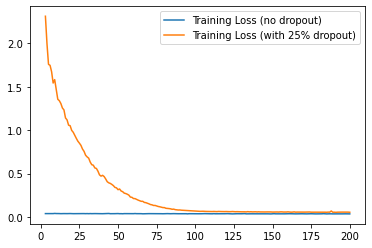

In [53]:
# Plot of model 1 vs. model 2 history
import matplotlib.pyplot as plt

plt.plot(df1['loss'][2:], label='Training Loss (no dropout)')
plt.plot(df2['loss'][2:], label='Training Loss (with 25% dropout)')

plt.legend()
plt.show()